In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# to show current working directory
!pwd 
!ls
%cd drive/MyDrive/Project
!ls

/content
drive  sample_data
/content/drive/MyDrive/Project
GlobalAiHubProject.ipynb  spectrograms


In [3]:
# importing libraries 
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [4]:
# to set path containing pics
path = '/content/drive/MyDrive/Project/spectrograms'

In [5]:
%%time

X_data = []
y_data = []

for subdir, dirs, files in os.walk(path):
    for file in files:
        pic = cv2.imread(os.path.join(subdir, file))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        pic = cv2.resize(pic, (32, 32))
        
        X_data.append(pic)
        y_data.append(int(subdir[-1]))
        # print(os.path.join(subdir, file))
        # print(int(subdir[-1]))

X = np.array(X_data) / 255
y = np.array(y_data).reshape(-1, 1)

#converting the list to numpy array and saving it to a file using #numpy.save
#np.save(os.path.join(path,'X_array'), X)
#np.save(os.path.join(path,'y_array'), y)

print(X.shape)
print(y.shape)

(8732, 32, 32)
(8732, 1)
CPU times: user 37.7 s, sys: 5.37 s, total: 43.1 s
Wall time: 3min 5s


In [6]:
print(X[0:2])
print(y[0:2])

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.55686275 0.43921569 0.31372549 ... 0.41568627 0.43921569 0.56078431]
  [0.67058824 0.62745098 0.61960784 ... 0.33333333 0.25098039 0.54117647]
  [0.31372549 0.14509804 0.20392157 ... 0.21960784 0.22745098 0.25098039]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.70980392 0.41960784 0.5254902  ... 0.43921569 0.47058824 0.61960784]
  [0.38823529 0.44705882 0.47843137 ... 0.29803922 0.29803922 0.43529412]
  [0.17254902 0.21960784 0.10980392 ... 0.07058824 0.15686275 0.1254902 ]]]
[[9]
 [9]]


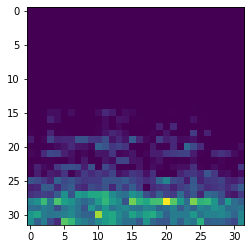

(32, 32)


In [7]:
plt.imshow(X[100])
plt.show()

print(X[100].shape)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 6112
y_train: 6112
X_val: 1310
y_val: 1310
X_test: 1310
y_test: 1310


In [9]:
# Create a model object
model = tf.keras.Sequential()

In [10]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32, 32, 1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add more convolution and max pooling layers
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
48/48 [==============================] - 12s 15ms/step - loss: 2.1596 - accuracy: 0.1864 - val_loss: 1.8583 - val_accuracy: 0.3412
Epoch 2/50
48/48 [==============================] - 0s 10ms/step - loss: 1.9216 - accuracy: 0.2767 - val_loss: 1.6035 - val_accuracy: 0.4252
Epoch 3/50
48/48 [==============================] - 0s 8ms/step - loss: 1.7555 - accuracy: 0.3505 - val_loss: 1.4515 - val_accuracy: 0.5069
Epoch 4/50
48/48 [==============================] - 0s 8ms/step - loss: 1.6330 - accuracy: 0.4076 - val_loss: 1.3278 - val_accuracy: 0.5458
Epoch 5/50
48/48 [==============================] - 0s 8ms/step - loss: 1.5022 - accuracy: 0.4553 - val_loss: 1.1893 - val_accuracy: 0.5779
Epoch 6/50
48/48 [==============================] - 0s 8ms/step - loss: 1.4357 - accuracy: 0.4931 - val_loss: 1.0766 - val_accuracy: 0.6511
Epoch 7/50
48/48 [==============================] - 0s 8ms/step - loss: 1.3332 - accuracy: 0.5185 - val_loss: 1.0161 - val_accuracy: 0.6763
Epoch 8/50
48/48 

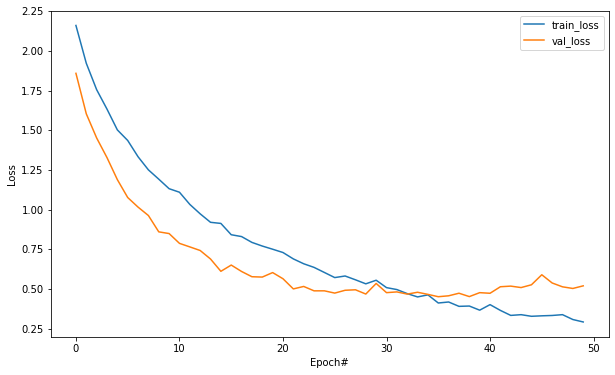

In [13]:
plt.figure(figsize=(10, 6))

# Plot the the training loss
plt.plot(results.history["loss"], label="train_loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")


# Name the x and y axises
plt.ylabel("Loss") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

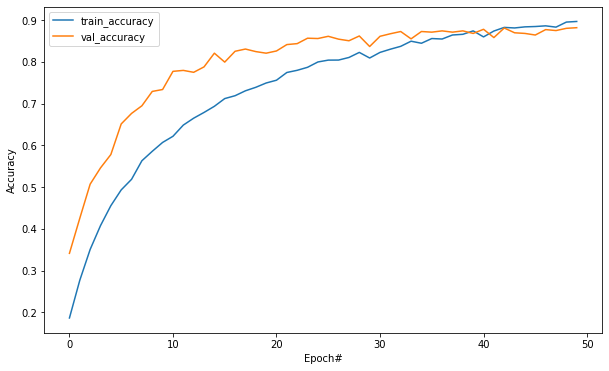

In [14]:
plt.figure(figsize=(10, 6))

# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="train_accuracy")


# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")


# Name the x and y axises
plt.ylabel("Accuracy") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [15]:
# Evaluate the performance
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.8603


[0.6408146023750305, 0.8603053689002991]

In [16]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1, 32, 32, 1))

# Print the prediction result
prediction_result

array([[3.2403047e-12, 3.5748384e-17, 6.6496271e-15, 3.6009289e-15,
        1.2372520e-05, 1.2345929e-09, 1.0395856e-13, 9.9998760e-01,
        1.5944068e-16, 4.7108148e-15]], dtype=float32)

In [17]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

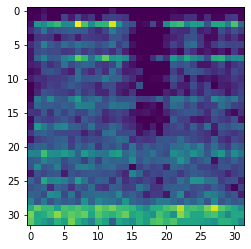

(32, 32)
This image belongs to class 7 with 0.9999876022338867 probability %
The actual class of the selected image is: [7]


In [18]:
plt.imshow(X_test[100])
plt.show()

print(X_test[100].shape)

# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")
print(f"The actual class of the selected image is: {y_test[100]}")